## Code to make Figure 5 (representing the random-effects model)

This code takes the output from the prediction model (model_coeffs_for_picture.csv) and then produces figure 5 in the paper. It requires the following python modules
- Numpy
- Pandas
- Matplotlib


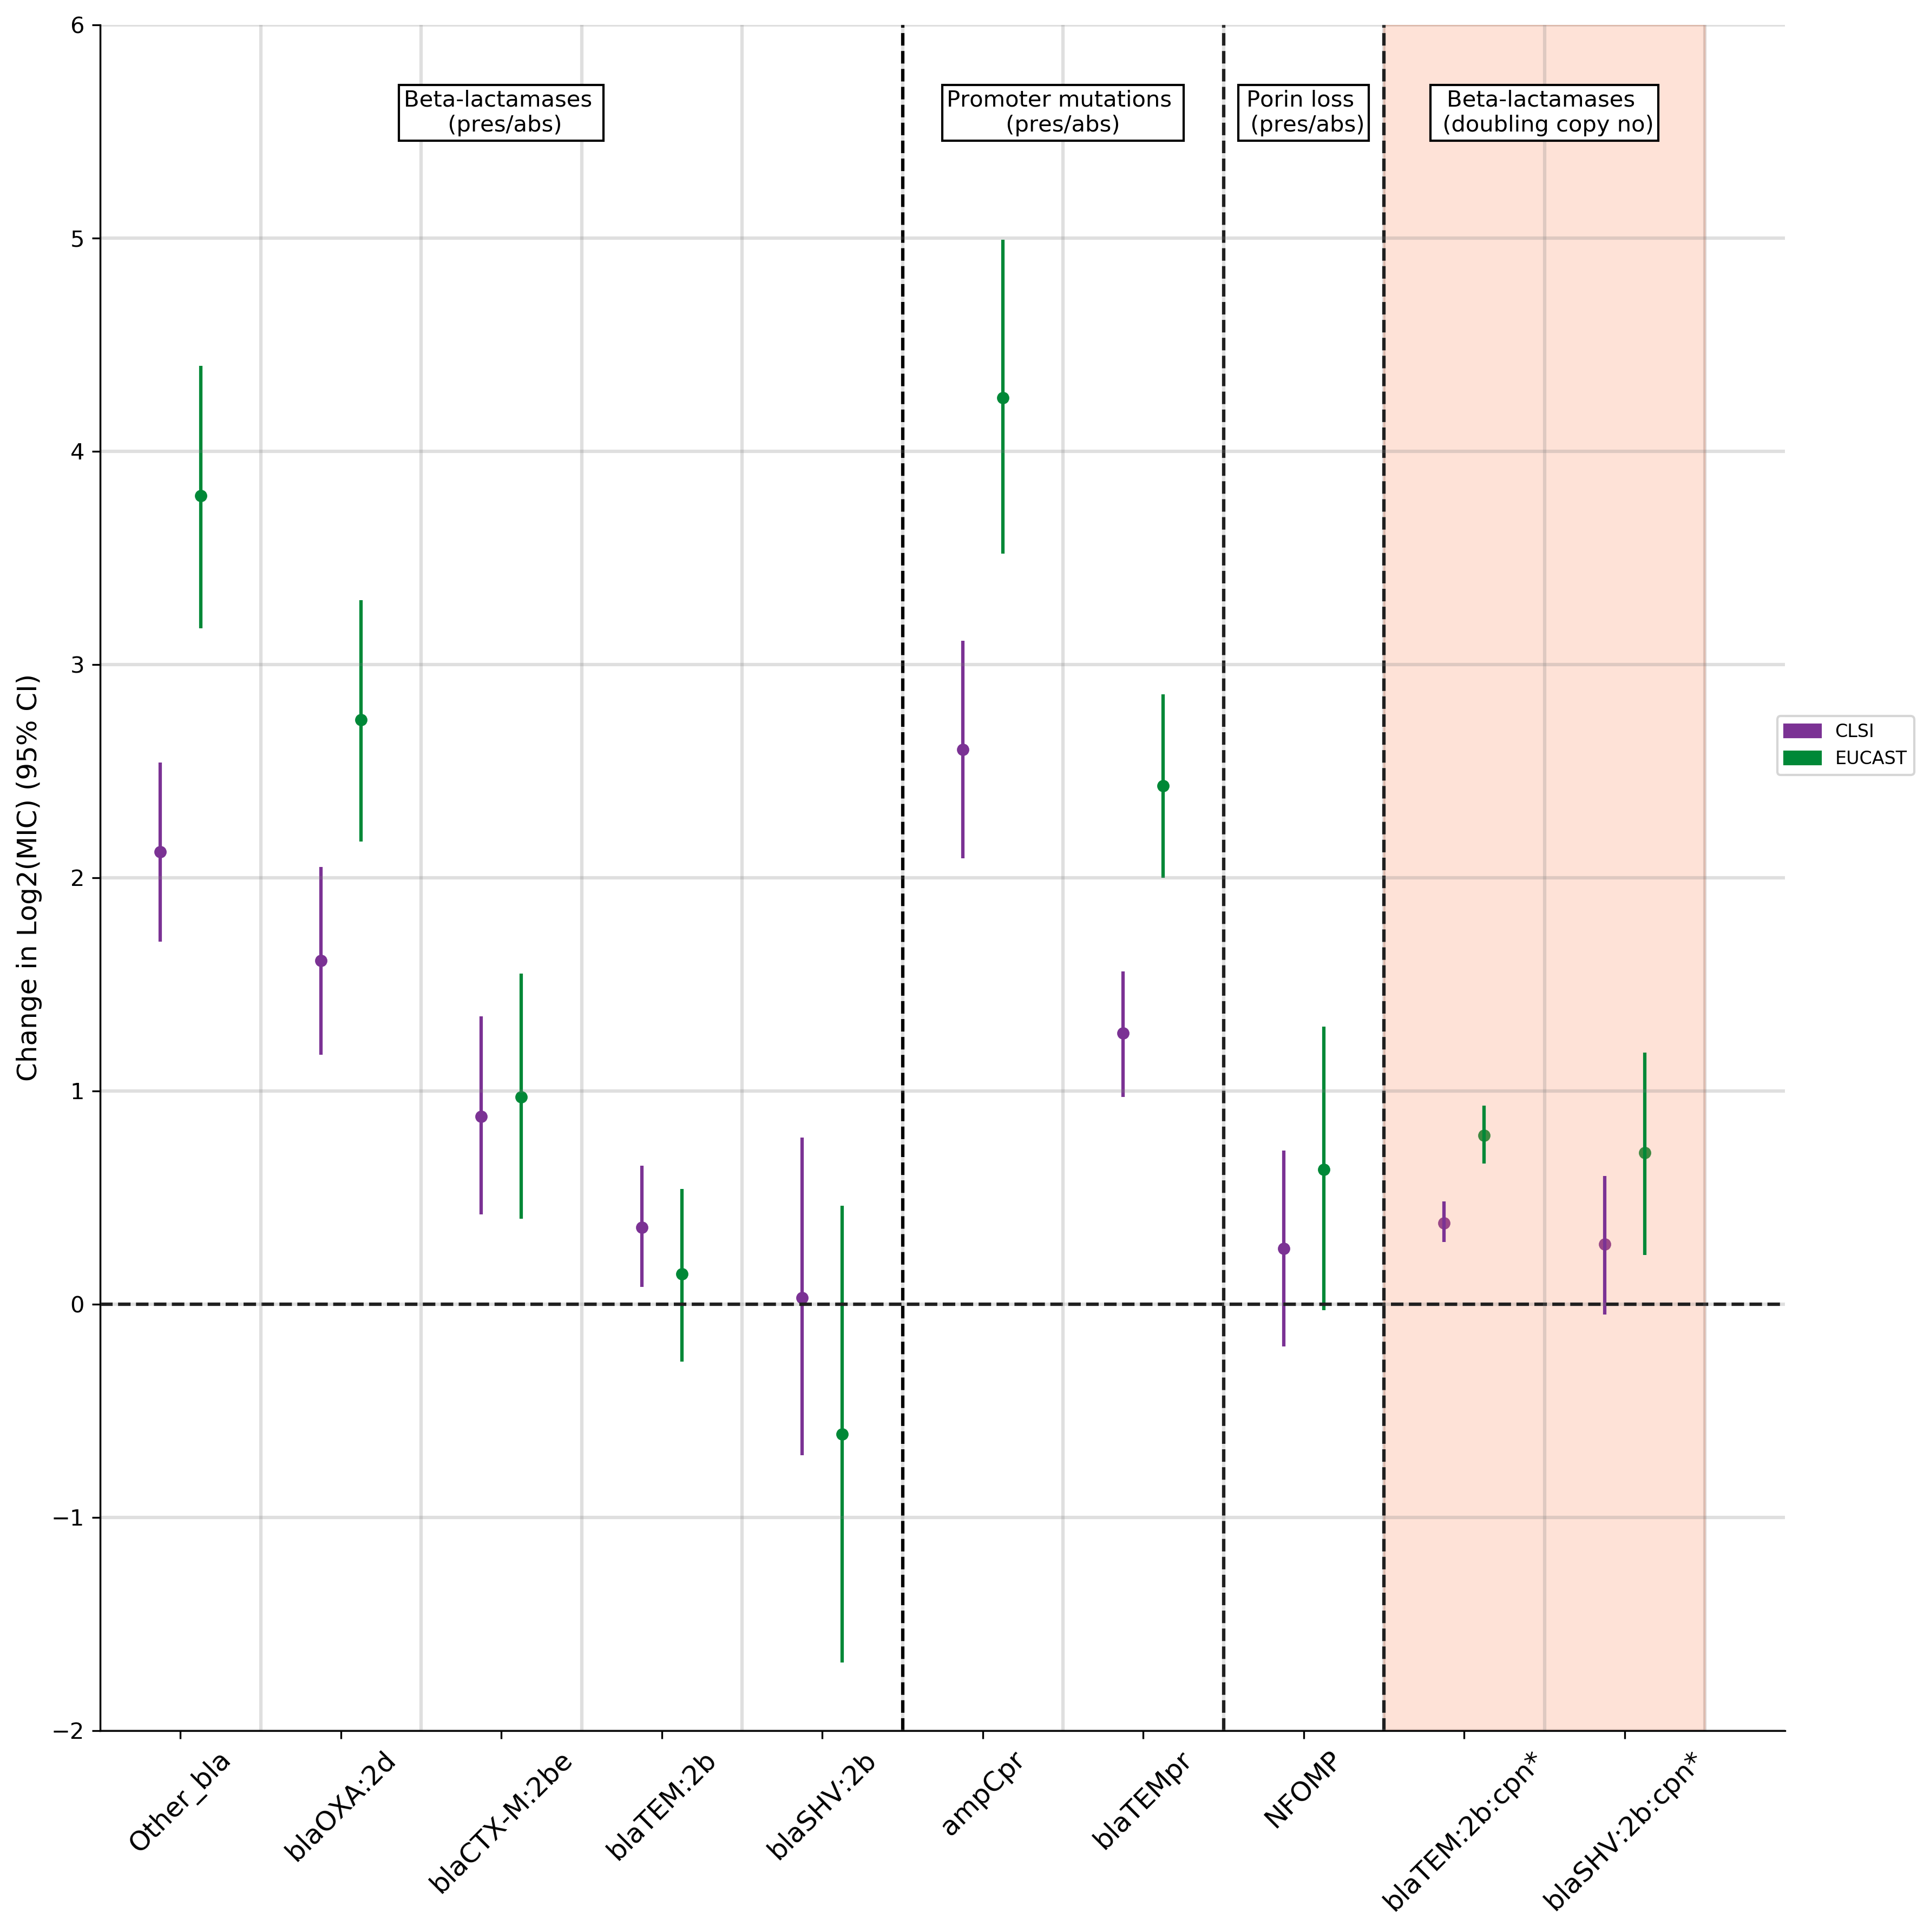

In [1]:
# This bit of code now just makes the graph as seen in the table from the stata output file model_coeffs_for_picture.csv
# Note it creates a clean version of this file which is slightly more interpretable in the interim

%matplotlib inline
# Tim model graph

# Required modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches


#Loading in the data
coeff_df = pd.read_csv("model_coeffs_for_picture.csv", index_col= 0)



# First relabelling the index to be more human readable
label_dict = {"mic:c_blaother_bla":"Other_bla", 
                "mic:e_blaother_bla": "Other_bla",
                "mic:c_blaoxa_buj2d_bin":"blaOXA:2d" , 
                "mic:e_blaoxa_buj2d_bin":"blaOXA:2d", 
                "mic:c_blactxm_buj2be_bin":"blaCTX-M:2be", 
                "mic:e_blactxm_buj2be_bin":"blaCTX-M:2be", 
                "mic:c_blatem_buj2b_bin":"blaTEM:2b", 
                "mic:e_blatem_buj2b_bin":"blaTEM:2b", 
                "mic:c_blashv_buj2b_bin":"blaSHV:2b", 
                "mic:e_blashv_buj2b_bin":"blaSHV:2b", 
                "mic:c_ampcprother_sigampcpr":"ampCpr", 
                "mic:e_ampcprother_sigampcpr":"ampCpr", 
                "mic:c_temprother_sigtem":"blaTEMpr", 
                "mic:e_temprother_sigtem":"blaTEMpr", 
             "mic:c_ompnon_functioning":"NFOMP" , 
             "mic:e_ompnon_functioning":"NFOMP", 
             "mic:c_blatem_buj2b_log":"blaTEM:2b:cpn*", 
             "mic:e_blatem_buj2b_log":"blaTEM:2b:cpn*", 
             "mic:c_blashv_buj2b_log": "blaSHV:2b:cpn*", 
             "mic:e_blashv_buj2b_log":"blaSHV:2b:cpn*"}



order_of_labels =['mic:c_blaother_bla', 'mic:e_blaother_bla',
                  'mic:c_blaoxa_buj2d_bin', 'mic:e_blaoxa_buj2d_bin', 
                  'mic:c_blactxm_buj2be_bin', 'mic:e_blactxm_buj2be_bin', 
                  'mic:c_blatem_buj2b_bin', 'mic:e_blatem_buj2b_bin', 
                  'mic:c_blashv_buj2b_bin', 'mic:e_blashv_buj2b_bin', 
                  'mic:c_ampcprother_sigampcpr', 'mic:e_ampcprother_sigampcpr',
                  'mic:c_temprother_sigtem', 'mic:e_temprother_sigtem', 
                  'mic:c_ompnon_functioning', 'mic:e_ompnon_functioning',
                  'mic:c_blatem_buj2b_log', 'mic:e_blatem_buj2b_log', 
                  'mic:c_blashv_buj2b_log', 'mic:e_blashv_buj2b_log']

def get_test_type(name):
    let = name.split(":")[1].split("_")[0]
    if let == "c":
        return "CLSI"
    else:
        return "EUCAST"
test_method_keys = {k:get_test_type(k) for k in label_dict.keys()}
dict_for_df = {"coeff_n":[k for k in order_of_labels], 
              "Elementname":[label_dict[k] for k in order_of_labels], 
              "test_method":[test_method_keys[k] for k in order_of_labels], 
              "Coefficient_exact":[coeff_df.loc[k].coeffs1 for k in order_of_labels], 
              "Coefficient": [round(coeff_df.loc[k].coeffs1, 2) for k in order_of_labels], 
              "higherCI": [coeff_df.loc[k].uci for k in order_of_labels ], 
              "upper95Ci": [round(coeff_df.loc[k].uci, 2) for k in order_of_labels], 
              "lowerCI": [coeff_df.loc[k].lci for k in order_of_labels ], 
              "lower95CI": [round(coeff_df.loc[k].lci, 2) for k in order_of_labels], 
               "labheight":[coeff_df.loc[k].labheight for k in order_of_labels ], 
               "se_s1":[coeff_df.loc[k].se_s1 for k in order_of_labels ]
              }
dict_for_df["ci_text"] = []
for k in order_of_labels:
    k_coeff = str(round(coeff_df.loc[k].coeffs1, 2))
    k_lb = str(round(coeff_df.loc[k].lci, 2))
    k_ub = str(round(coeff_df.loc[k].uci, 2))
    op = "{0} ({1},{2})" .format(k_coeff, k_lb, k_ub)
    dict_for_df["ci_text"].append(op)
    
model_coeffs = pd.DataFrame.from_dict(dict_for_df)
model_coeffs.to_csv("output_model_coeffs_clean.csv")
df = model_coeffs


f  = plt.figure(figsize=(12,12), dpi=300)
ax = plt.subplot2grid((1,1),(0,0), rowspan = 1 , colspan= 1)

clsi_df = df.loc[df['test_method'] == "CLSI"]
x1 = sorted([4*i+1  for i in range(20)])
x1 = [x1[i] for i in range(len(clsi_df))]
y1 = list(clsi_df['Coefficient'])
y1_lower = list(clsi_df['lower95CI'])
y1_lower = [y1[i] - y1_lower[i] for i in range(len(y1))]
y1_upper = list(clsi_df['upper95Ci'])
y1_upper = [y1_upper[i] - y1[i] for i in range(len(y1))]

eucast_df = df.loc[df['test_method'] == "EUCAST"]
x2 = sorted([4*i+2 for i in range(20)])
x2 = [x2[i] for i in range(len(clsi_df))]
y2 = list(eucast_df['Coefficient'])
y2_lower = list(eucast_df['lower95CI'])
y2_lower = [y2[i] - y2_lower[i] for i in range(len(y1))]
y2_upper = list(eucast_df['upper95Ci'])
y2_upper = [y2_upper[i] - y2[i] for i in range(len(y1))]


x = sorted([i-0.5 for i in x2])
names = list(eucast_df['Elementname'])


ax.errorbar(x1, y1, yerr=[y1_lower, y1_upper], color='#7b3294',linestyle="None", alpha= 1)
ax.scatter(x1, y1 , color='#7b3294', alpha=1, s=20)
ax.errorbar(x2, y2, yerr=[y2_lower, y2_upper], color='#008837', linestyle="None", alpha = 1)
ax.scatter(x2, y2, color='#008837', alpha = 1, s=20)
ax.axhline(y=0, color='black', alpha=1.0, linestyle='dashed')
ax.set_xticks(x)
ax.set_yticks([-2, -1, 0,1,2,3,4,5,6])
ax.set_ylabel("Change in Log2(MIC) (95% CI)", fontsize=12)
ax.set_xticklabels(names,fontsize=12, rotation=45)
clsi_patch = mpatches.Patch(color='#7b3294', label='CLSI')
eucast_patch = mpatches.Patch(color='#008837', label='EUCAST')
plt.legend(handles=[clsi_patch, eucast_patch], bbox_to_anchor=(0.99, 0.6), prop={'size':8})
fig_size = [6.4,8.4]
plt.gcf().subplots_adjust(bottom=0.27)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axvline(x=-0.5, color='grey', alpha=0.25)
ax.axvline(x=3.5, color='grey', alpha=0.25)
ax.axvline(x=7.5, color='grey', alpha=0.25)
ax.axvline(x=11.5, color='grey', alpha=0.25)
ax.axvline(x=15.5, color='grey', alpha=0.25)
ax.axvline(x=19.5, color='grey', alpha=0.25)
ax.axvline(x=19.5, color='black', alpha=1.0, linestyle='dashed')
ax.axvline(x=23.5, color='grey', alpha=0.25)
ax.axvline(x=27.5, color='black', alpha=1.0, linestyle='dashed')
ax.axvline(x=27.5, color='grey', alpha=0.25)
ax.axvline(x=31.5, color='black', alpha=1.0, linestyle='dashed')
ax.axvline(x=31.5, color='grey', alpha=0.25)
ax.axvline(x=35.5, color='grey', alpha=0.25)
ax.axvline(x=39.5, color='grey', alpha=0.25)
ax.axhline(y=-2, color='grey', alpha=0.25)
ax.axhline(y=-1, color='grey', alpha=0.25)
ax.axhline(y=0, color='grey', alpha=0.25)
ax.axhline(y=1, color='grey', alpha=0.25)
ax.axhline(y=2, color='grey', alpha=0.25)
ax.axhline(y=3, color='grey', alpha=0.25)
ax.axhline(y=4, color='grey', alpha=0.25)
ax.axhline(y=5, color='grey', alpha=0.25)
ax.axhline(y=6, color='grey', alpha=0.25)
ax.axvspan(31.5, 39.5, alpha=0.25, color='#fc8d62')
ax.set_xlim(-0.5, )
ax.set_ylim(-2,)
ax.text(x=9.5, y=5.5, s="Beta-lactamases \n (pres/abs)", bbox={'facecolor':'white', 'alpha':1 ,'pad':2 }, ha="center", fontsize=10 )
ax.text(x=23.5, y=5.5, s="Promoter mutations \n (pres/abs) ", bbox={'facecolor':'white', 'alpha':1 ,'pad':2 }, ha="center" , fontsize=10)
ax.text(x=29.5, y=5.5, s="Porin loss \n (pres/abs)", bbox={'facecolor':'white', 'alpha':1 ,'pad':2 }, ha="center", fontsize=10 )
ax.text(x=35.5, y=5.5, s="Beta-lactamases \n (doubling copy no)", bbox={'facecolor':'white', 'alpha':1 ,'pad':2 }, ha="center" , fontsize=10)
plt.tight_layout()
plt.show()